In [1]:
import randomwalk as rw
import numpy as np
import matplotlib.pyplot as plt

# CW10 : Monte Carlo Techniques

The word "Monte Carlo" is a fancy term for what essentially means "using random numbers." Since computers are good at generating (pseudo)random numbers quickly, it can be advantageous to use this randomness for simulations. In this notebook, you will explore a few interesting examples of this idea.

## Estimating $\pi$
As a simple example, consider the following technique for computing the number $\pi$:
  - Area of a unit circle : $\pi$
  - Area of a the minimum box that fits the unit circle, with side length 2 : $4$
  - Fraction of area of the box taken up by the unit circle: $\pi/4$
  - Therefore: If one finds the fraction of random points that uniformly cover such a box that fall inside the unit circle, then multiplying this fraction by 4 will yield $\pi$.

Let's test this idea:

In [2]:
def estimate_pi(N=100000):
    # Generate N random x and y coordinates within the box with sides from [-2,2]
    xs = np.random.uniform(-1,1,N)
    ys = np.random.uniform(-1,1,N)
    # Count how many points lie within the unit circle
    circle = np.where(xs**2 + ys**2 < 1, 1, 0).sum()
    # Compute pi
    return 4 * circle / N

In [3]:
for N in [10, 100, 1000, 10000, 100000, 1000000, 10000000]:
    print("N=",N, " : pi=", estimate_pi(N))

N= 10  : pi= 2.8
N= 100  : pi= 2.96
N= 1000  : pi= 3.12
N= 10000  : pi= 3.1548
N= 100000  : pi= 3.15604
N= 1000000  : pi= 3.138384


N= 10000000  : pi= 3.1425104


Not bad for such a simple idea!

## Integrating a Function

Consider the following definition for integrating a function $f(x)$ between $x\in[a,b]$:

In [4]:
def estimate_integral(f,a,b,N=100000):
    xs = np.random.uniform(a,b,N)
    return f(xs).sum() * (b-a)/N

What does this do? It generates $N$ randomly chosen points $x_i$ in the range $[a,b]$, then finds the average function value of all those points $\bar{f} = \sum_{i=1}^N f(x_i)/N$, then multiplies this average value by the interval length to find the area: $A = \bar{f}*(b-a)$. This method relies upon the theorem in calculus that the integral is equal to the average value of the function over a domain times the domain itself (essentially approximating the whole integral as one big rectangle). Let's see how well it works in practice.

Recall that $\int_0^{2\pi}\sin(x)dx = 0$. Let's try to compute that using Monte Carlo methods:

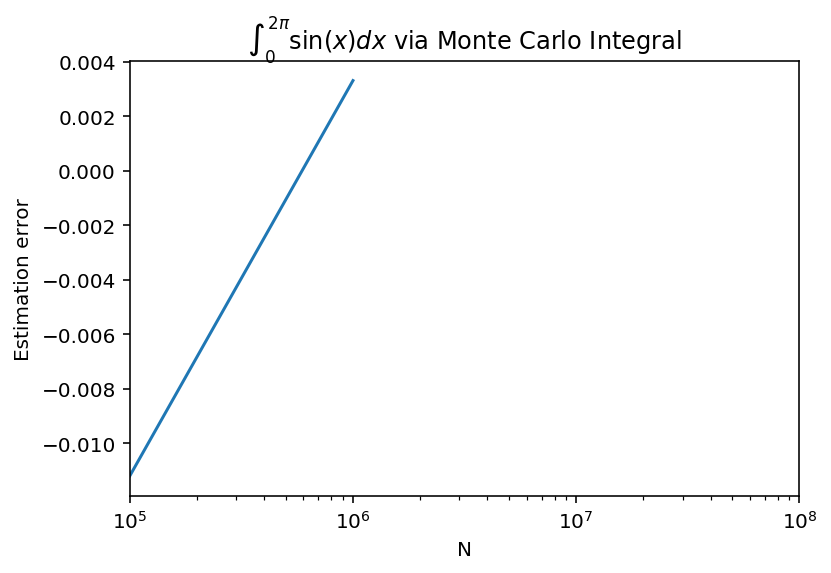

In [5]:
Ns = [10**i for i in range(5,7)]
Is = [estimate_integral(np.sin, 0, 2*np.pi, n) for n in Ns]
plt.semilogx(Ns,Is)
plt.title(r"$\int_0^{2\pi}\sin(x)dx$ via Monte Carlo Integral")
plt.xlabel("N")
plt.ylabel("Estimation error")
plt.xlim(10**5,10**8)
plt.show()

It does in fact converge eventually. Though this method is vastly less efficient than the trapezoid rule we have been using deterministically in 1D, it turns out that for higher dimensional integrals (like 10D) this stochastic technique can substantially outperform similar deterministic strategies.

## Random Walks

Where Monte Carlo methods really shine is in approximating behavior that is common in thermodynamics. For example, the air molecules in a room collide with each other constantly, effective jostling each other into random bits of short motion between collisions. Similarly, the molecules in a solid like a table vibrate and randomly exchange packets of energy as they essentially bump into each other - these packets of energy flow through the solid in the form of heat.

If we don't care much about the details of the motion, but want to capture the overall effects of the random jostling, we can simulate random walks of particles.

As a simple example, the following code places 100 particles at the origin of a 2D plane, then has them randomly walk around by taking integer steps in one of the four cardinal directions (E, W, N, S). The resulting animation shows their motion over time.

In [6]:
g = rw.walk_gen(walkers=100)

In [7]:
rw.plot_anim(g, xlim=(-50,50), ylim=(-50,50), max_frames=200)

<source type="video/mp4" src="data:video/mp4;base64,AAAAHGZ0eXBNNFYgAAACAGlzb21pc28yYXZjMQAAAAhmcmVlAAGgjG1kYXQAAAKuBgX//6rcRem9
5tlIt5Ys2CDZI+7veDI2NCAtIGNvcmUgMTQ4IHIyNjQzIDVjNjU3MDQgLSBILjI2NC9NUEVHLTQg
QVZDIGNvZGVjIC0gQ29weWxlZnQgMjAwMy0yMDE1IC0gaHR0cDovL3d3dy52aWRlb2xhbi5vcmcv
eDI2NC5odG1sIC0gb3B0aW9uczogY2FiYWM9MSByZWY9MyBkZWJsb2NrPTE6MDowIGFuYWx5c2U9
MHgzOjB4MTEzIG1lPWhleCBzdWJtZT03IHBzeT0xIHBzeV9yZD0xLjAwOjAuMDAgbWl4ZWRfcmVm
PTEgbWVfcmFuZ2U9MTYgY2hyb21hX21lPTEgdHJlbGxpcz0xIDh4OGRjdD0xIGNxbT0wIGRlYWR6
b25lPTIxLDExIGZhc3RfcHNraXA9MSBjaHJvbWFfcXBfb2Zmc2V0PS0yIHRocmVhZHM9NiBsb29r
YWhlYWRfdGhyZWFkcz0xIHNsaWNlZF90aHJlYWRzPTAgbnI9MCBkZWNpbWF0ZT0xIGludGVybGFj
ZWQ9MCBibHVyYXlfY29tcGF0PTAgY29uc3RyYWluZWRfaW50cmE9MCBiZnJhbWVzPTMgYl9weXJh
bWlkPTIgYl9hZGFwdD0xIGJfYmlhcz0wIGRpcmVjdD0xIHdlaWdodGI9MSBvcGVuX2dvcD0wIHdl
aWdodHA9MiBrZXlpbnQ9MjUwIGtleWludF9taW49MjUgc2NlbmVjdXQ9NDAgaW50cmFfcmVmcmVz
aD0wIHJjX2xvb2thaGVhZD00MCByYz1jcmYgbWJ0cmVlPTEgY3JmPTIzLjAgcWNvbXA9MC42MCBx
cG1pbj0wIHFwbWF4PTY5IHFwc3RlcD00IGlwX3JhdGlvPTEuNDAgYXE9MToxLjAwAIAAAAWmZYiE
ADP//vbsvgU1/Z/QlxEsxdpKcD4qpICAdzTAAAADAAB4HShe6DhKq9DAABvIzcIk3f+ABLO++E67
pBhendidMhig5WmV6h73lqDj7Mh1OsrP9f35GBGKX23n8bzqT7oTWwNaVDGHQZS1Tk42Zt8BMtTD
twpUXrXmNVJNC2SyLhfqlPF65cdQsGzFpMNaBJESVb8QxBvWgQUMZbvilb+VYoQUbuQlR0ET/4rY
TY9eXMjCwRyIVgg6Sj6hr7uNdBumu2p7hDRQAEnUEDh87papwAmwgxaOFP1Hx1s/P4JY1Mn2//A0
soxfSsfTj9lXwG4TxtIKw8Dfd0WKLHQUDzDpLJIBgNnDim7CXJ57bCMV0vhmAnRD7r5PpQp+PbhK
2w67nflvWH6oVE8n6ghcpm9FjRt8pG8iYECzH5vrFEXWLOJ1XsaBxwJZNrxZr4nyXBHl+1Z2PqW+
8pyb9xHsXeqKkS0in8HcWlTDSNvshwhe4zMM7OxcFzn+xmjBaHCqxjBgvK0B9PPy24OWZiKSEMG0
QOgcXERsuTEVDCsNPg12q5qCVTZbn9CFTd04Sm3UT16kUBAtq9Ioub8/W66kshGDXcjyBe9JapwE
+5VgA0zPumhrjUF6uh2lWqyUZeC/bghDGlOBZuinCqmIv2TKxnAZ4rHbKuf79q4ZWetdwz9eEyA8
ThHTRL5MtE6EqqaIYc8c5ioDsB32IUzBR7Wujp0R+Ag7/okLKUaX9DOWJZF6WkihqvpuGSAF2ZU/
gakqp7JlHXhP+V4A7NU4znfCJtCfNlGpDc/yeakioZ/w5ybFsRy9SU/YUi87R+6mEdzqtILP9Qns
HX7egtXOEW4Wuq75x6/w6+EIJS2Esa9AtdedKUq1MXm1JPF+d8i3xuRVx7wAjYACTioMke1RVmoM
x4dX8L7583/0OSJGTaocPLzSt+uc+f/7DBpjaEuCoNnUDrD39r72H3JwZns7XyayHH9vbARXi28H
wfryUvwbLR//L23Rzj1l1PSiK8ND7cKnAN18tL6jF2uo9ao1aXjEvP81cB9o0r/CQwo89wgwaNIP
xc6XvFF54Q7ACCrFLxGbPfO9xLoU2IPJZAydBEIVgKZkpuXpuenqLypSbdLMP06pKZuebDIb08Ij
NlRx2TOhwAweKMfWHtTq+HkPqYpsfkpeBP0xKA19EGNOqU4wj+E64ffGVoFSxyeBVfVEhm3D5wvy
fGLDcZnReLkGF2zFEPITcmMaPp8qaeU4t+Vpzmdi41Z+npYp2Z8MXAGNIDk+Zx2c24L6qh48ragv
l5NYc32Chg4xh/1pXwjfJlUGcvp0ZH9566nFls6xFyRo8vNQc5A5pkYfc6NfcIK3p1tnKx56Wc71
okfB66hi4FvPyKY/qFwiQMIEk9N0+rduk5NpHZnduuPY0jlP8w6a4slyQK6mjp8Z4qUwyrJYhMa+
VEkkKz8/6AmkkmrAQqfrkAkZP5153vU4xWGrWXrepjS7cEEekDtGDPYTfo70LPLx3Sd5tAi4RbVJ
lYMXtnNaXfP64YnzIuNU5e32Pz5o3mcAU6UyudvkPyDJzApt3+1IVXkqW5BTDu7xUB2gzCJB8R0n
W4TFQaZARHbdpnTvweHs9qP7PnYTun21T+RnLvpDRsXUX03IBN2QE4fbP56XERG53K8hMHxlhfl4
dGzl1sIoMN/0ov/fIz5tNmTBIILfKYsl0BLVa5aikUkGQ0rp7wGj8Ocgb8E9zYujNPSTxtABslk9
qvhwvcXgC/+uF9R3gwz2L55T9ushVn/ulzAQWIY68dSblTnYGSlAVll/fF7WRXfIEif6zelpTxeq
1ilfeh5EQB6fBqCm3PiU8wp9Fo4ZQKO6Ur/BNZloBUI2X6g6AJh58v99LiY7yWhbSzld1Go1f4ox
iw3nYb3waC2yANqr9BqAm83FAAABe0GaJGxDP/6eEGdsdzplel6qwgWgEwymrfMKSvz7XfylJ6lz
7YpXccd00TgZT2mtrP2amFIyg+aReVRO94eC/snT9WYhqpnTdovn21TLxa6cZ+vLx/H+BH95iUTB
zCFvl6431TZWli7rpXb/O/WQqrdZpPHnZlNScn8Y2c+doT0aLYC+zTb2noUc6Ths6/mLslHeSzHF
Rr+vKgWOepTyQHWBlUpg51OZ3e+/hU4RXpiAHG1LDjknpvfDY+lgtQMKlXtps6qDgA5+OmVQt9qa
q71Y8jTRBuF7j4QelmKKDhBTYtFH++jTM6cuyoJ87r9Fy73f6yIuaMUubgUW+He8oh1w12Ul89Ie
dhZPNnZnFiPcfiPxL42O0TC0ewLSyKI3jJY8YGFmQtz4RM8tX5Atg9yq+6QN1I4eXSOR71gc5nR4
9Rvk5c0m8AWf20oyFmC7ky3Fn/bb0igJO85NCoL/fmmISmvUfNDGZPwYU54mXpkJ8Q5SfJGHRLiw
6EgAAACKQZ5CeIR/BH3XXWpbbqRK+QtYeL4LzNgxmHFIrA06WARvah3PMMnIPPMH+tJvMZse9iBU
66pVAZLTJah/PNNTIcU8AAnHPhT6pAyRBDYnnVIV2RNmRJSrcgeOqkV5SopUFgzwBJxtwx654Mkd
PJknOb5NvCcG+ZEmIdCRDjvo5SCA3LFdx3yKZzJxAAAARwGeYXRH/wfrzEHkWi8v+wAAAwAAbRJ2
qZYPTMz5TXy0Skj2VAB5f//FIKFEABe71TPqCoKEcZjo2MtQL8XoTyUHiPk4rENLAAAAbwGeY2pH
/wftu6rAr+tDemwkAAADAFEJTLCCROoUTgxKEyYZWABDojLe72he7nkMPPuY97/fx056ybOC/pGH
5SIJOq2oFZjdipMogkxhsC3HlQzN/+xp1klPkFUYYABWM5avWiNV749sOWEHwduY0QAAAP5BmmhJ
qEFomUwIZ//+nhB/4sc8w

## Exercise

Create a new random walk generator that prevents the particles from passing through a box with walls at $x=-20,20$ and $y=-20,20$.  To make things interesting, place a hole in your box at $x=20$ for the range $y\in[-4,4]$ such that particles can wander freely in that region of the hole as before.  Make sure particles outside the box and inside the box cannot move through the box walls, but otherwise move freely.  Modify the animation function so that the initialization frame draws the boundaries of your box in addition to the particles.

In [8]:
g2 = rw.new_walk_gen(walkers=100)

In [9]:
rw.new_plot_anim(g2, xlim=(-50,50), ylim=(-50,50), max_frames=200)

TypeError: only integer scalar arrays can be converted to a scalar index